# Project 2 - Ames Housing Data and Kaggle Challenge
## Revisited

When reviewing the various projects I completed during my time with General Assembly I found that Project 2, based on an existing Kaggle challenge, offered to most room for improvement. My notebooks were a mess: there was no clear organization to the repository as a whole and each individual notebook represented the full 'Data Science Process' (Cleaning through Model Deployment), each for a different list of features. 

While the project was not particularly complicated, the way in which I originally approached the project was: I now had a chance to improve upon the work I had done in a more succinct, cleaner manner. 

**Imports:**

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

**Reading in Data**

In [2]:
#reading in training and testing data
ames_df = pd.read_csv('../datasets/train.csv')
ames_test_df = pd.read_csv('../datasets/test.csv')

In [3]:
ames_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
print(f'The ames_df dataframe is {ames_df.shape} rows by columns')

The ames_df dataframe is (2051, 81) rows by columns


In [5]:
ames_test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
print(f'The ames_test_df dataframe is {ames_test_df.shape} rows by columns')

The ames_test_df dataframe is (878, 80) rows by columns


In [7]:
#listing all columns for ames_df: 
ames_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
ames_test_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
#renaming columns to preferred nomenclature 
ames_df.columns = ames_df.columns.str.strip().str.lower()
ames_df.columns = ames_df.columns.str.replace(' ', '_')
ames_df.columns[:5]

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage'], dtype='object')

In [10]:
#doing the same thing to our testing data:
ames_test_df.columns = ames_test_df.columns.str.strip().str.lower()
ames_test_df.columns = ames_test_df.columns.str.replace(' ', '_')
ames_test_df.columns[:5]

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage'], dtype='object')

In [11]:
#dropping 'id' and 'pid' columns:
ames_df.drop(columns = ['id', 'pid'], inplace = True)

In [12]:
#doing the same thing to our testing data:
ames_test_df.drop(columns = ['id', 'pid'], inplace = True)

**Exploring the Data**

In [13]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      2051 non-null   int64  
 1   ms_zoning        2051 non-null   object 
 2   lot_frontage     1721 non-null   float64
 3   lot_area         2051 non-null   int64  
 4   street           2051 non-null   object 
 5   alley            140 non-null    object 
 6   lot_shape        2051 non-null   object 
 7   land_contour     2051 non-null   object 
 8   utilities        2051 non-null   object 
 9   lot_config       2051 non-null   object 
 10  land_slope       2051 non-null   object 
 11  neighborhood     2051 non-null   object 
 12  condition_1      2051 non-null   object 
 13  condition_2      2051 non-null   object 
 14  bldg_type        2051 non-null   object 
 15  house_style      2051 non-null   object 
 16  overall_qual     2051 non-null   int64  
 17  overall_cond  

In [14]:
np.round(ames_df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
ms_subclass,2051.0,57.01,42.82,20.0,20.0,50.0,70.00,190.0
lot_frontage,1721.0,69.06,23.26,21.0,58.0,68.0,80.00,313.0
lot_area,2051.0,10065.21,6742.49,1300.0,7500.0,9430.0,11513.50,159000.0
overall_qual,2051.0,6.11,1.43,1.0,5.0,6.0,7.00,10.0
overall_cond,2051.0,5.56,1.10,1.0,5.0,5.0,6.00,9.0
year_built,2051.0,1971.71,30.18,1872.0,1953.5,1974.0,2001.00,2010.0
year_remod/add,2051.0,1984.19,21.04,1950.0,1964.5,1993.0,2004.00,2010.0
mas_vnr_area,2029.0,99.70,174.96,0.0,0.0,0.0,161.00,1600.0
bsmtfin_sf_1,2050.0,442.30,461.20,0.0,0.0,368.0,733.75,5644.0
bsmtfin_sf_2,2050.0,47.96,165.00,0.0,0.0,0.0,0.00,1474.0


- Reviewing the above table, we see that there's an outlier/error in 'Garage Yr Blt', a value of 2207.0, apart from this, none of the other values standout.

In [15]:
ames_df.loc[ames_df['garage_yr_blt'] == 2207]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1699,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,267300


- The home was build in 2007 so I am going to replace the current 'Garage Yr Blt' value with 2007.

In [16]:
ames_df.loc[1699, ['garage_yr_blt']] = 2007

#https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe
#df.loc[<row selection>, <column selection>]

**Checking Null Values**

In [17]:
np.round(ames_df.isna().sum().sort_values(ascending = False)[0:30] / len(ames_df), 4)

pool_qc           0.9956
misc_feature      0.9683
alley             0.9317
fence             0.8050
fireplace_qu      0.4876
lot_frontage      0.1609
garage_finish     0.0556
garage_qual       0.0556
garage_yr_blt     0.0556
garage_cond       0.0556
garage_type       0.0551
bsmt_exposure     0.0283
bsmtfin_type_2    0.0273
bsmt_cond         0.0268
bsmt_qual         0.0268
bsmtfin_type_1    0.0268
mas_vnr_area      0.0107
mas_vnr_type      0.0107
bsmt_full_bath    0.0010
bsmt_half_bath    0.0010
garage_area       0.0005
garage_cars       0.0005
total_bsmt_sf     0.0005
bsmt_unf_sf       0.0005
bsmtfin_sf_2      0.0005
bsmtfin_sf_1      0.0005
3ssn_porch        0.0000
screen_porch      0.0000
full_bath         0.0000
half_bath         0.0000
dtype: float64

In [18]:
np.round(ames_test_df.isna().sum().sort_values(ascending = False)[0:30] / len(ames_df), 4)

pool_qc           0.4261
misc_feature      0.4081
alley             0.3998
fence             0.3442
fireplace_qu      0.2058
lot_frontage      0.0780
garage_yr_blt     0.0219
garage_finish     0.0219
garage_qual       0.0219
garage_cond       0.0219
garage_type       0.0215
bsmtfin_type_2    0.0122
bsmt_cond         0.0122
bsmt_exposure     0.0122
bsmtfin_type_1    0.0122
bsmt_qual         0.0122
electrical        0.0005
mas_vnr_type      0.0005
mas_vnr_area      0.0005
totrms_abvgrd     0.0000
functional        0.0000
kitchen_abvgr     0.0000
bedroom_abvgr     0.0000
half_bath         0.0000
full_bath         0.0000
bsmt_half_bath    0.0000
bsmt_full_bath    0.0000
kitchen_qual      0.0000
ms_subclass       0.0000
fireplaces        0.0000
dtype: float64

- Although in the training data (ames_df) 90% of the values in the columns 'pool_qc', 'misc_feature', and 'alley' are null, the testing data (ames_test_df) has far fewer nulls. I will not be dropping any of these features from modeling. 

In [19]:
#DROP DROP DROP #DROP DROP DROP #DROP DROP DROP 
#DROP DROP DROP #DROP DROP DROP #DROP DROP DROP 
#DROP DROP DROP #DROP DROP DROP #DROP DROP DROP 

## Exploratory Data Analysis

**Basic Visualizations**

This section contains basic data visualizations representing the counts, frequencies of measurements from the dataframe.

In [20]:
ames_df['lot_area'].value_counts().sort_index()

1300      1
1470      1
1476      1
1477      1
1484      1
         ..
57200     1
63887     1
70761     1
115149    1
159000    1
Name: lot_area, Length: 1476, dtype: int64

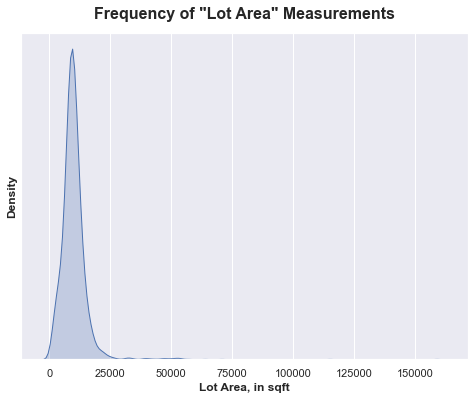

In [21]:
plt.figure(figsize = (8, 6))

plt.title('Frequency of "Lot Area" Measurements',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)

sns.kdeplot(x = 'lot_area', shade = 'fill', data = ames_df)

plt.xlabel(xlabel = 'Lot Area, in sqft',
           fontweight = 'bold')
plt.ylabel(ylabel = 'Density',
           fontweight = 'bold')

plt.yticks([]);

- A plot representing the frequency of 'Lot Area' measurements across houses in the dataset

In [22]:
ames_df[ames_df['lot_area'] > 70_000]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
471,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,277000
694,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,302000
1854,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655.0,Unf,0.0,878.0,1533.0,GasA,TA,Y,SBrkr,1533,0,0,1533,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1975.0,Unf,2.0,576.0,TA,TA,Y,200,54,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,280000


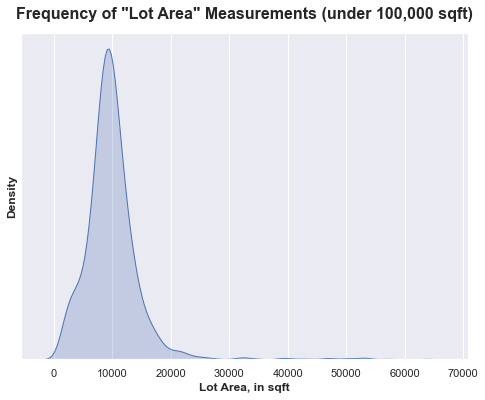

In [23]:
#and for values under 70_000
plt.figure(figsize = (8, 6))

plt.title('Frequency of "Lot Area" Measurements (under 100,000 sqft)',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)

sns.kdeplot(x = 'lot_area', shade = 'fill', data = ames_df[ames_df['lot_area'] < 70_000])

plt.xlabel(xlabel = 'Lot Area, in sqft',
           fontweight = 'bold')
plt.ylabel(ylabel = 'Density',
           fontweight = 'bold')

plt.yticks([]);

- A plot representing the frequency of 'Lot Area' measurements across houses in the dataset, excluding measurements over 70,000 sqft

In [24]:
print(ames_df['condition_1'].value_counts().sort_index())
print('_break_')
print(ames_df['condition_2'].value_counts().sort_index())

Artery      70
Feedr      109
Norm      1767
PosA        12
PosN        27
RRAe        21
RRAn        36
RRNe         3
RRNn         6
Name: condition_1, dtype: int64
_break_
Artery       5
Feedr       11
Norm      2025
PosA         3
PosN         3
RRAe         1
RRAn         1
RRNn         2
Name: condition_2, dtype: int64


In [25]:
#function to generate count plots
def make_countplot(dataframe,
                   x = None,
                   hue = None,
                   palette = None,
                   ax = None):
    
    return sns.countplot(data = dataframe,
                         x = x,
                         hue = hue,
                         palette = palette,
                         ax = ax)

In [26]:
#IN THE PROCESS ON COMPLETING EDA I GENERATED LOTS OF COUNTPLOTS.
#I NEED TO GO THROUGH AND NEATEN THINGS UP WITH THE ABOVE FUNCTION.

#WORDS #WORDS #WORDS 
#WORDS #WORDS #WORDS 
#WORDS #WORDS #WORDS 

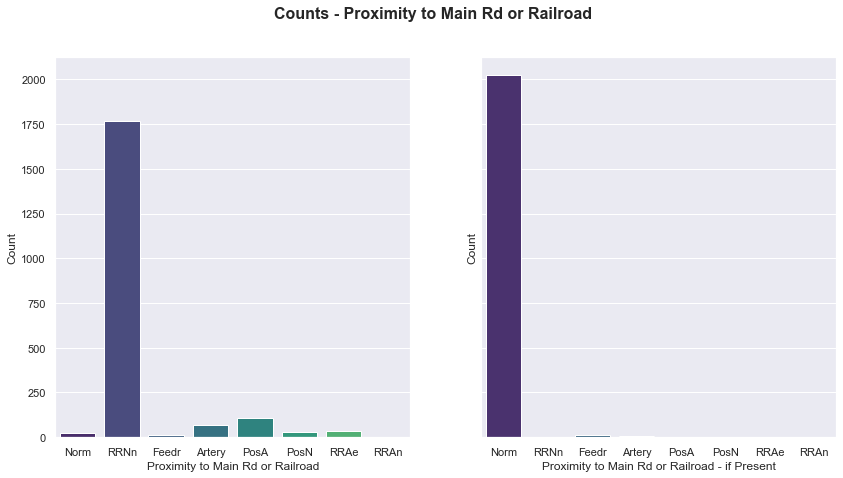

In [27]:
fig, axes = plt.subplots(nrows = 1,
                         ncols = 2, 
                         sharey = True,
                         sharex = True,
                         figsize = (14, 7))

fig.suptitle('Counts - Proximity to Main Rd or Railroad',
             fontsize = 16,
             fontweight = 'bold')

ax0 = sns.countplot(ax = axes[0],
                    x = 'condition_1',
                    data = ames_df, 
                    palette = 'viridis')
ax0.set(xlabel = 'Proximity to Main Rd or Railroad',
        ylabel = 'Count')

ax1 = sns.countplot(ax = axes[1],
                    x = 'condition_2',
                    data = ames_df, 
                    palette = 'viridis')
ax1.set(xlabel = 'Proximity to Main Rd or Railroad - if Present',
        ylabel = 'Count');

- Side-by-side plots representing the counts of the categorical variables 'condition_1' and 'condition_2', the proximity of the house to a Main Rd or Railroad, offering a comparison between the two features. 

In [28]:
print(ames_df['overall_qual'].value_counts().sort_index())
print('_break_')
print(ames_df['overall_cond'].value_counts().sort_index())

1       4
2       9
3      29
4     159
5     563
6     506
7     431
8     250
9      77
10     23
Name: overall_qual, dtype: int64
_break_
1       4
2       6
3      35
4      70
5    1168
6     368
7     270
8     101
9      29
Name: overall_cond, dtype: int64


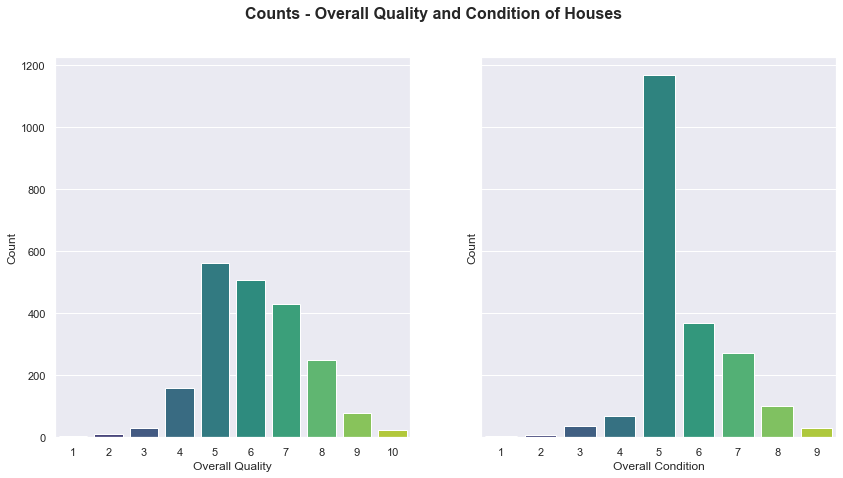

In [29]:
fig, axes = plt.subplots(nrows = 1,
                         ncols = 2, 
                         sharey = True, 
                         figsize = (14, 7))

fig.suptitle('Counts - Overall Quality and Condition of Houses',
             fontsize = 16,
             fontweight = 'bold')

ax0 = sns.countplot(ax = axes[0],
                    x = 'overall_qual',
                    data = ames_df, 
                    palette = 'viridis')
ax0.set(xlabel = 'Overall Quality',
        ylabel = 'Count')

ax1 = sns.countplot(ax = axes[1],
                    x = 'overall_cond',
                    data = ames_df, 
                    palette = 'viridis')
ax1.set(xlabel = 'Overall Condition',
        ylabel = 'Count');

- Side-by-side plots representing the counts of the categorical variables 'overall_qual' and 'overall_cond', the overall material and finish quality and the overall condition rating, respectively

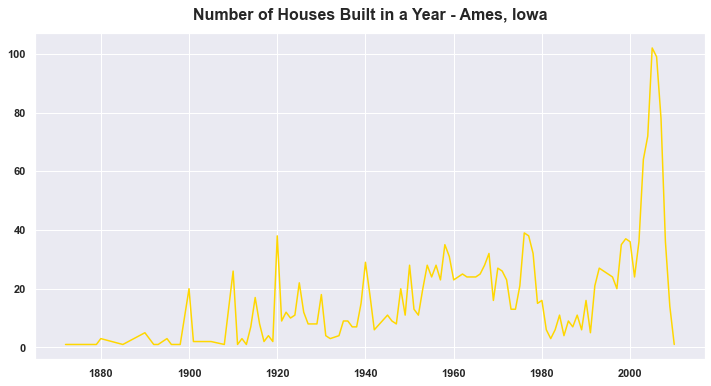

In [30]:
plt.figure(figsize = (12, 6))

plt.title('Number of Houses Built in a Year - Ames, Iowa', 
          fontsize = 16, 
          fontweight = 'bold', 
          y = 1.025)

ames_df['year_built'].value_counts().sort_index().plot(linewidth = 1.5,
                                                       color = 'gold')

plt.xticks(fontweight = 'bold')

plt.yticks(fontweight = 'bold');

- A line plot representing the number of houses built in a given year (whew, look at that 'Housing Bubble' burst)

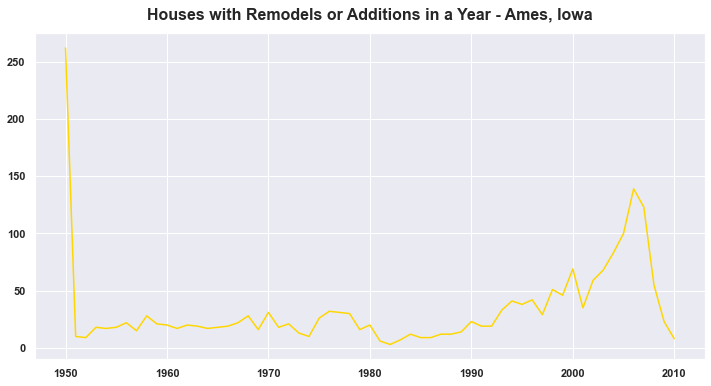

In [31]:
plt.figure(figsize = (12, 6))

plt.title('Houses with Remodels or Additions in a Year - Ames, Iowa', 
          fontsize = 16, 
          fontweight = 'bold', 
          y = 1.025)

ames_df['year_remod/add'].value_counts().sort_index().plot(linewidth = 1.5,
                                                           color = 'gold')

plt.xticks(fontweight = 'bold')

plt.yticks(fontweight = 'bold');

- A line plot representing the number of houses either remodeled or added onto in a given year

In [32]:
#MORE GRAPHS #MORE GRAPHS #MORE GRAPHS 
#MORE GRAPHS #MORE GRAPHS #MORE GRAPHS 
#MORE GRAPHS #MORE GRAPHS #MORE GRAPHS 

In [33]:
print(ames_df['exter_qual'].value_counts().sort_index())
print('_break_')
print(ames_df['exter_cond'].value_counts().sort_index())

Ex      81
Fa      26
Gd     697
TA    1247
Name: exter_qual, dtype: int64
_break_
Ex       7
Fa      49
Gd     215
Po       2
TA    1778
Name: exter_cond, dtype: int64


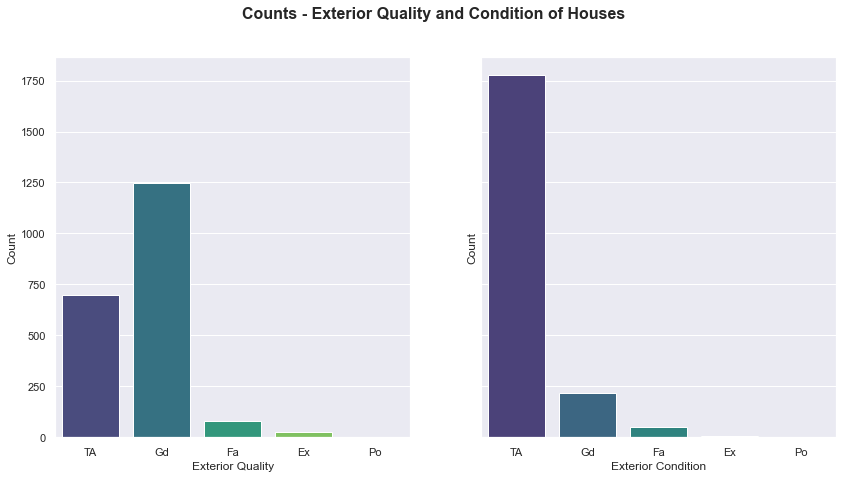

In [34]:
fig, axes = plt.subplots(nrows = 1,
                         ncols = 2, 
                         sharex = True,
                         sharey = True, 
                         figsize = (14, 7))

fig.suptitle('Counts - Exterior Quality and Condition of Houses',
             fontsize = 16,
             fontweight = 'bold')

ax0 = sns.countplot(ax = axes[0],
                    x = 'exter_qual',
                    data = ames_df, 
                    palette = 'viridis')
ax0.set(xlabel = 'Exterior Quality',
        ylabel = 'Count')

ax1 = sns.countplot(ax = axes[1],
                    x = 'exter_cond',
                    data = ames_df, 
                    palette = 'viridis')
ax1.set(xlabel = 'Exterior Condition',
        ylabel = 'Count');

- WORDSWORDSWORDS

In [35]:
print(ames_df['bsmt_qual'].value_counts().sort_index())
print('_break_')
print(ames_df['bsmt_cond'].value_counts().sort_index())

Ex    184
Fa     60
Gd    864
Po      1
TA    887
Name: bsmt_qual, dtype: int64
_break_
Ex       3
Fa      65
Gd      89
Po       5
TA    1834
Name: bsmt_cond, dtype: int64


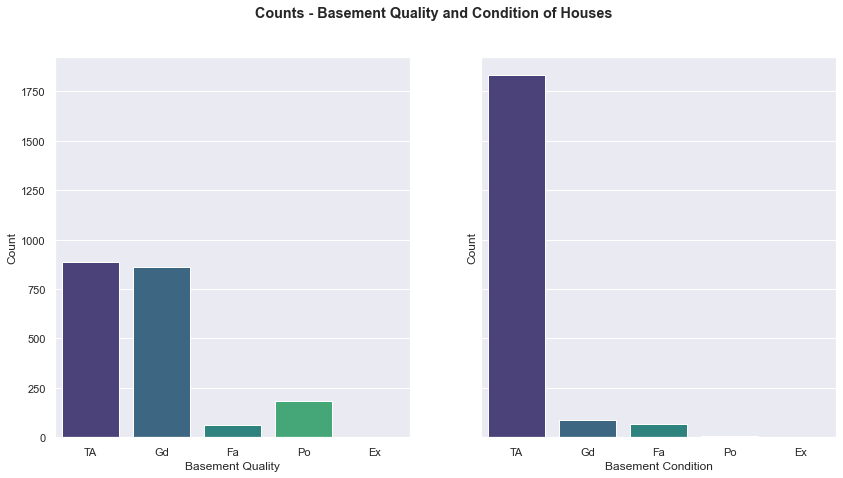

In [36]:
fig, axs = plt.subplots(figsize = (14, 7),
                        nrows = 1,
                        ncols = 2,
                        sharex = True,
                        sharey = True)

plt.suptitle('Counts - Basement Quality and Condition of Houses', fontweight = 'bold');

make_countplot(ames_df, x = 'bsmt_qual', palette = 'viridis', ax = axs[0]).set(xlabel = 'Basement Quality',
                                                                               ylabel = 'Count')
make_countplot(ames_df, x = 'bsmt_cond', palette = 'viridis', ax = axs[1]).set(xlabel = 'Basement Condition',
                                                                               ylabel = 'Count');

In [37]:
#WORDS #WORDS #WORDS 
#WORDS #WORDS #WORDS 
#WORDS #WORDS #WORDS 

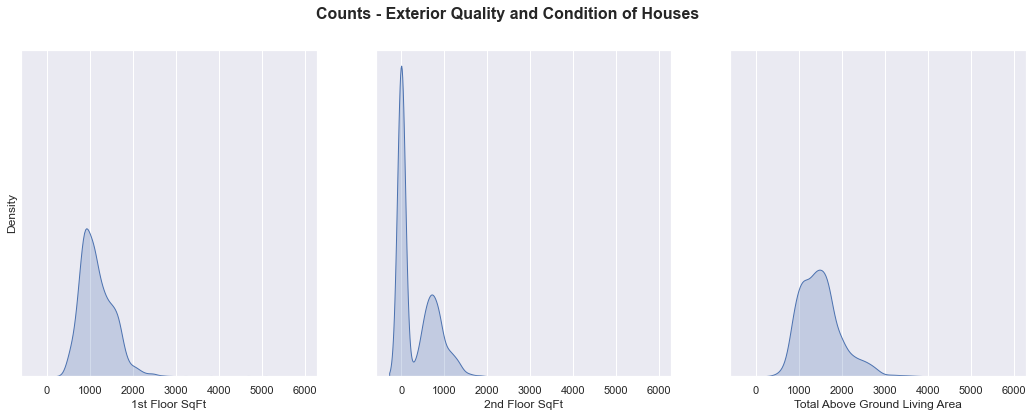

In [38]:
fig, axes = plt.subplots(nrows = 1,
                         ncols = 3, 
                         sharex = True,
                         sharey = True, 
                         figsize = (18, 6))

fig.suptitle('Counts - Exterior Quality and Condition of Houses',
             fontsize = 16,
             fontweight = 'bold')

ax0 = sns.kdeplot(ax = axes[0], x = '1st_flr_sf', shade = 'fill', data = ames_df)
ax0.set(xlabel = '1st Floor SqFt')

ax1 = sns.kdeplot(ax = axes[1], x = '2nd_flr_sf', shade = 'fill', data = ames_df)
ax1.set(xlabel = '2nd Floor SqFt')

ax2 = sns.kdeplot(ax = axes[2], x = 'gr_liv_area', shade = 'fill', data = ames_df)
ax2.set(xlabel = 'Total Above Ground Living Area')

plt.yticks([]);

In [39]:
#WORDS #WORDS #WORDS 
#WORDS #WORDS #WORDS 
#WORDS #WORDS #WORDS 

In [40]:
print(ames_df['full_bath'].value_counts().sort_index())
print('_break_')
print(ames_df['half_bath'].value_counts().sort_index())

0       8
1     900
2    1096
3      45
4       2
Name: full_bath, dtype: int64
_break_
0    1308
1     725
2      18
Name: half_bath, dtype: int64


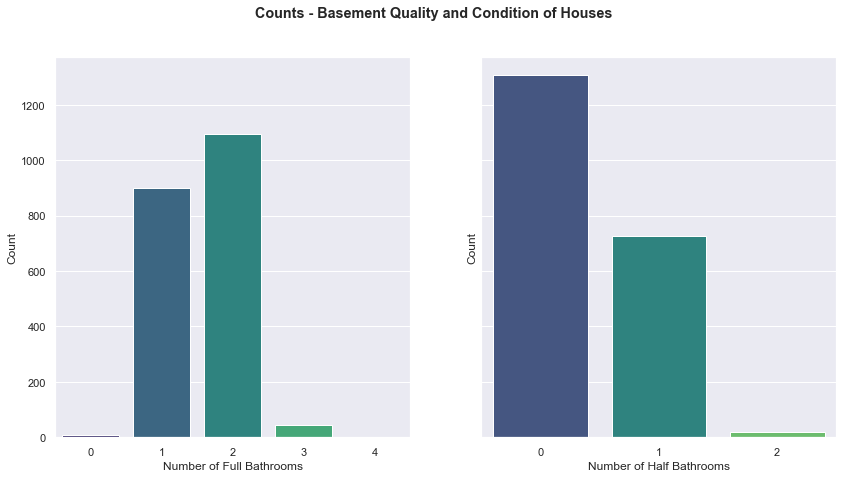

In [41]:
fig, axs = plt.subplots(figsize = (14, 7),
                        nrows = 1,
                        ncols = 2,
                        sharey = True)

plt.suptitle('Counts - Basement Quality and Condition of Houses', fontweight = 'bold');

make_countplot(ames_df, x = 'full_bath', palette = 'viridis', ax = axs[0]).set(xlabel = 'Number of Full Bathrooms',
                                                                               ylabel = 'Count')
make_countplot(ames_df, x = 'half_bath', palette = 'viridis', ax = axs[1]).set(xlabel = 'Number of Half Bathrooms',
                                                                               ylabel = 'Count');

In [42]:
#WORDS #WORDS #WORDS 
#WORDS #WORDS #WORDS 
#WORDS #WORDS #WORDS 

In [43]:
print(ames_df['garage_qual'].value_counts().sort_index())
print('_break_')
print(ames_df['garage_cond'].value_counts().sort_index())

Ex       3
Fa      82
Gd      18
Po       2
TA    1832
Name: garage_qual, dtype: int64
_break_
Ex       2
Fa      47
Gd      12
Po       8
TA    1868
Name: garage_cond, dtype: int64


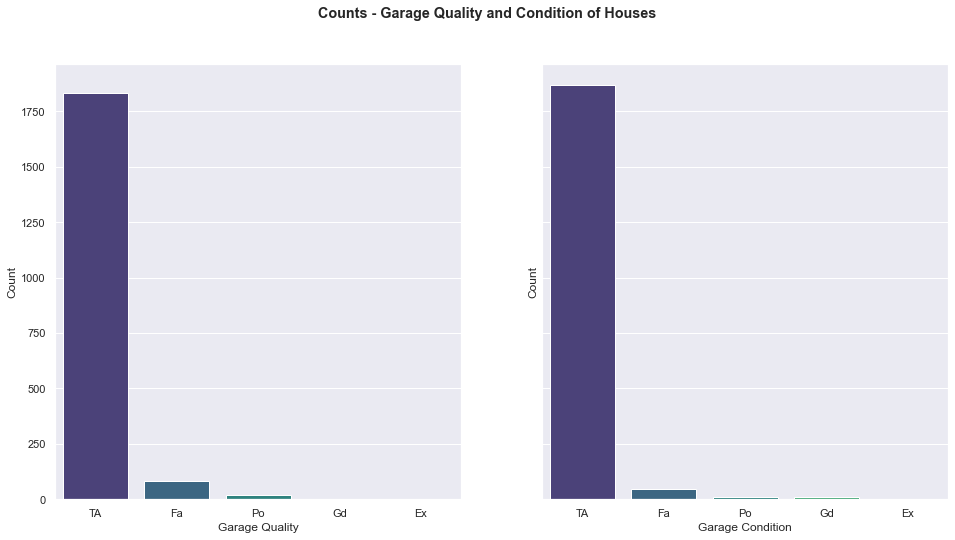

In [44]:
fig, axs = plt.subplots(figsize = (16, 8),
                        nrows = 1,
                        ncols = 2,
                        sharex = True,
                        sharey = True)

plt.suptitle('Counts - Garage Quality and Condition of Houses', fontweight = 'bold');

make_countplot(ames_df, x = 'garage_qual', palette = 'viridis', ax = axs[0]).set(xlabel = 'Garage Quality',
                                                                               ylabel = 'Count')
make_countplot(ames_df, x = 'garage_cond', palette = 'viridis', ax = axs[1]).set(xlabel = 'Garage Condition',
                                                                               ylabel = 'Count');

In [45]:
#WORDS #WORDS #WORDS 
#WORDS #WORDS #WORDS 
#WORDS #WORDS #WORDS 

**Additional Data Visualizations - Based on Correlation**

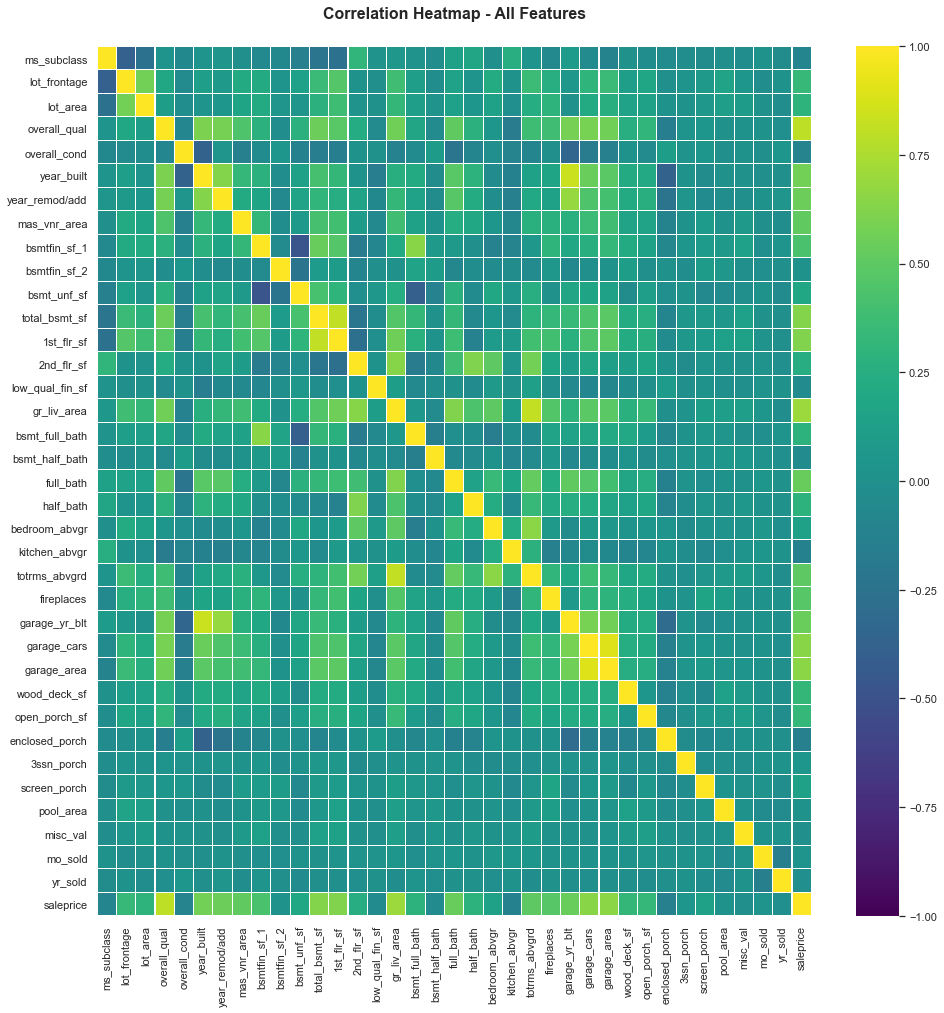

In [46]:
plt.figure(figsize = (16, 16))

plt.title('Correlation Heatmap - All Features',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)

sns.heatmap(ames_df.corr(),
            #annot = True,
            fmt = '.2f',
            linewidth = .1,
            vmin = -1,
            vmax = 1,
            cmap = 'viridis');

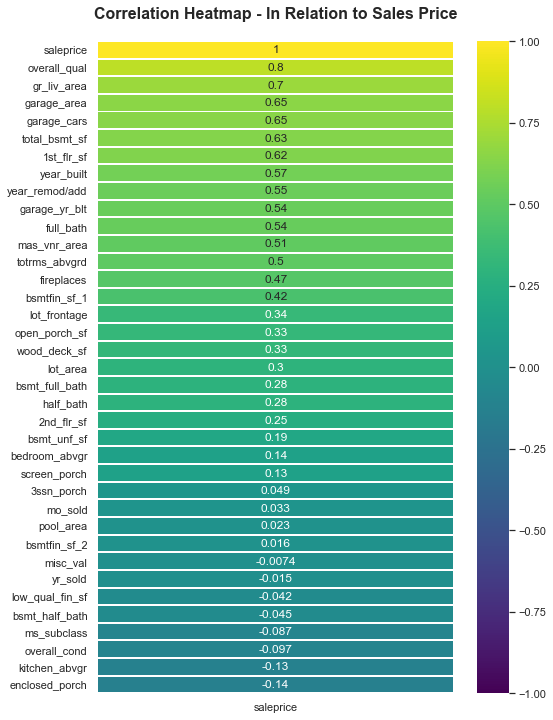

In [47]:
plt.figure(figsize = (8, 12))

plt.title('Correlation Heatmap - In Relation to Sales Price',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)

sns.heatmap(ames_df.corr()[['saleprice']].sort_values('saleprice', ascending = False),
            vmin = -1,
            vmax = 1,
            annot = True,
            linewidths = 1,
            cmap='viridis');

In [48]:
ames_corr = ames_df.corr()['saleprice'][:-1]
ames_corr[(ames_corr > 0.4)].sort_values(ascending = False)

overall_qual      0.800207
gr_liv_area       0.697038
garage_area       0.650270
garage_cars       0.648220
total_bsmt_sf     0.628925
1st_flr_sf        0.618486
year_built        0.571849
year_remod/add    0.550370
garage_yr_blt     0.540931
full_bath         0.537969
mas_vnr_area      0.512230
totrms_abvgrd     0.504014
fireplaces        0.471093
bsmtfin_sf_1      0.423519
Name: saleprice, dtype: float64

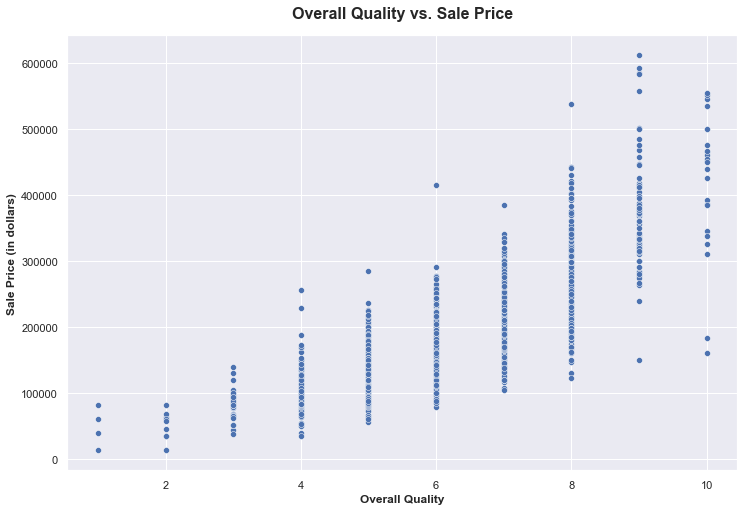

In [49]:
plt.figure(figsize = (12, 8))

plt.title('Overall Quality vs. Sale Price',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)

sns.scatterplot(x = ames_df['overall_qual'],
                y = ames_df['saleprice'],
                palette = 'viridis')

plt.xlabel('Overall Quality',
           fontweight = 'bold')

plt.ylabel('Sale Price (in dollars)',
           fontweight = 'bold')

plt.show();

- Based on the above plot there are no apparent outliers with respect to the relationship between Sale Price and Overall Quality

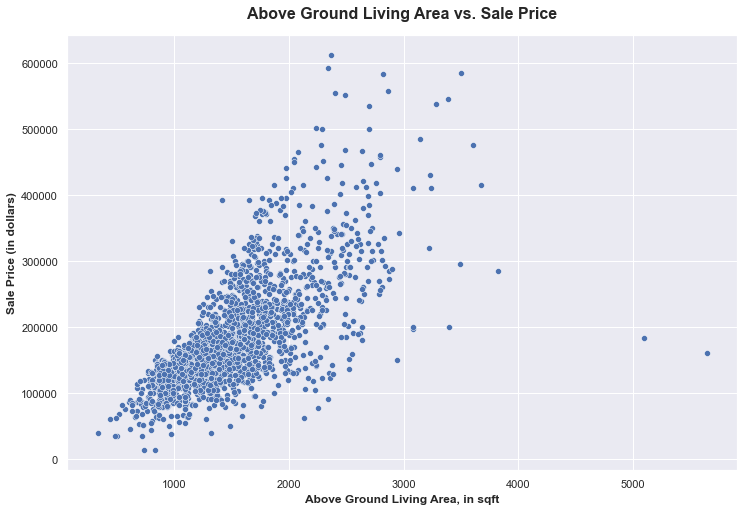

In [50]:
plt.figure(figsize = (12, 8))

plt.title('Above Ground Living Area vs. Sale Price',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)

sns.scatterplot(x = ames_df['gr_liv_area'],
                y = ames_df['saleprice'],
                palette = 'viridis')

plt.xlabel('Above Ground Living Area, in sqft',
           fontweight = 'bold')

plt.ylabel('Sale Price (in dollars)',
           fontweight = 'bold')

plt.show();

- Based on the above plot there are two outliers with respect to the relationship between Sale Price and Above Ground Living Area:
    1) The datapoint around (x = 5,100, y = 190,000)
    2) The datapoint around (x = 5,700, y = 170,000)

In [51]:
ames_df[ames_df['gr_liv_area'] > 5000]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


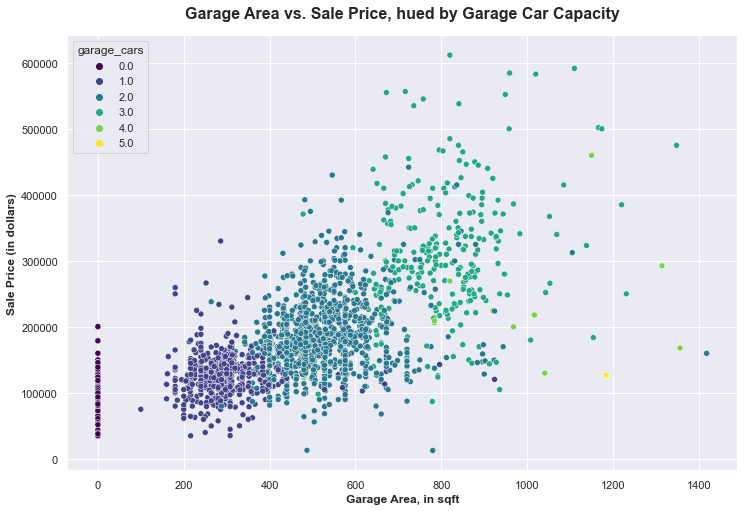

In [52]:
plt.figure(figsize = (12, 8))

plt.title('Garage Area vs. Sale Price, hued by Garage Car Capacity',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)

sns.scatterplot(x = ames_df['garage_area'],
                y = ames_df['saleprice'],
                hue = ames_df['garage_cars'],
                palette = 'viridis')

plt.xlabel('Garage Area, in sqft',
           fontweight = 'bold')

plt.ylabel('Sale Price (in dollars)',
           fontweight = 'bold')

plt.show();

- The above plot shows the relationship between Garage Area and Sale Price, with datapoints hued according to the Garage's car capacity

**Additional Data Visualizations - As Practice**

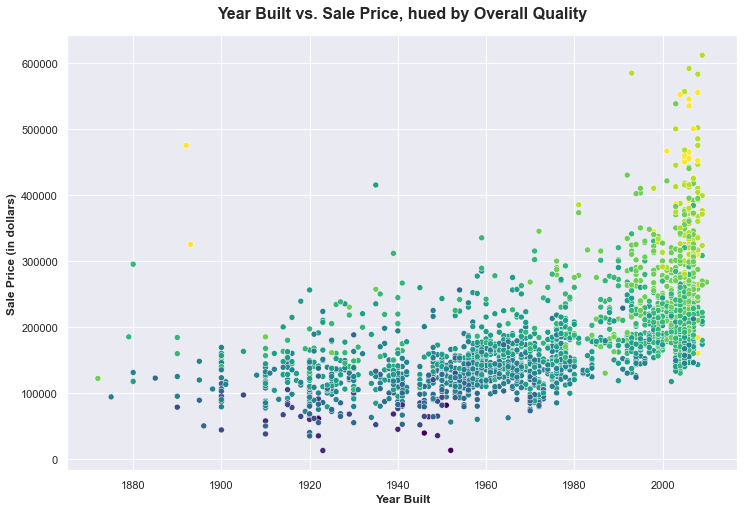

In [53]:
plt.figure(figsize = (12, 8))

plt.title('Year Built vs. Sale Price, hued by Overall Quality',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)

sns.scatterplot(x = ames_df['year_built'],
                y = ames_df['saleprice'],
                hue = ames_df['overall_qual'],
                palette = 'viridis')

plt.xlabel('Year Built',
           fontweight = 'bold')
plt.ylabel('Sale Price (in dollars)',
           fontweight = 'bold')

plt.legend([], [], frameon = False)

plt.show()

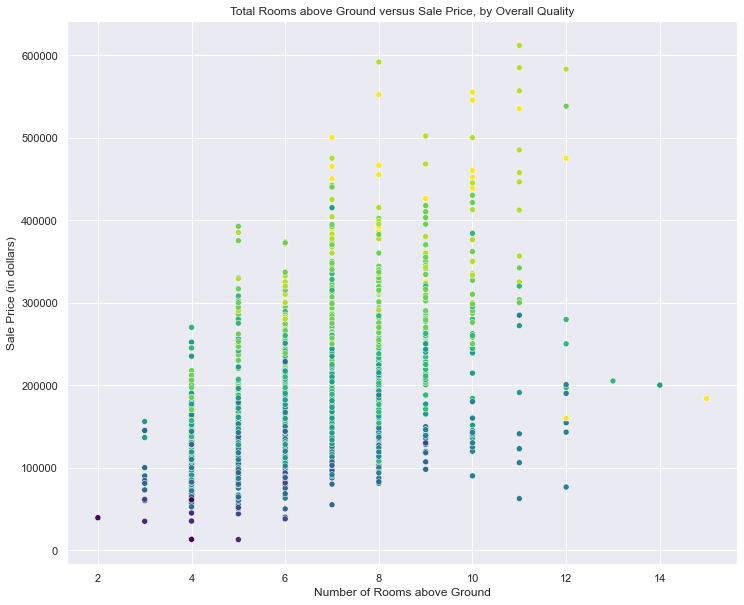

In [54]:
plt.figure(figsize = (12, 10))

plt.title('Total Rooms above Ground versus Sale Price, by Overall Quality')

sns.scatterplot(x = ames_df['totrms_abvgrd'],
                y = ames_df['saleprice'],
                hue = ames_df['overall_qual'],
                palette = 'viridis')

plt.xlabel('Number of Rooms above Ground')

plt.ylabel('Sale Price (in dollars)')

plt.legend([], [], frameon = False)

plt.show()

In [55]:
# __STOPPED__

In [56]:
ames_df.columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'gara

**One-Hot Encoding with Get Dummies**

For ease of processing, I am dummifying all 'object' columns, including their null values:

In [57]:
ames_df = pd.get_dummies(ames_df, columns = ames_df.select_dtypes('object').columns, dummy_na = True)
ames_df

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,ms_zoning_nan,street_Grvl,street_Pave,street_nan,alley_Grvl,alley_Pave,alley_nan,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,lot_shape_nan,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,land_contour_nan,utilities_AllPub,utilities_NoSeWa,utilities_NoSewr,utilities_nan,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,lot_config_nan,land_slope_Gtl,land_slope_Mod,land_slope_Sev,land_slope_nan,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,neighborhood_nan,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_1_nan,condition_2_Artery,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,condition_2_nan,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,bldg_type_nan,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,house_style_nan,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_style_nan,roof_matl_ClyTile,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,roof_matl_nan,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_1st_nan,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,exterior_2nd_nan,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,mas_vnr_type_nan,exter_qual_Ex,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_qual_nan,exter_cond_Ex,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,exter_cond_nan,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,foundation_nan,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_qual_nan,bsmt_cond_Ex,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_Po,bsmt_cond_TA,bsmt_cond_nan,bsmt_exposure_Av,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmt_exposure_nan,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_1_nan,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,bsmtfin_type_2_nan,heating_GasA,heating_G

In [58]:
ames_test_df = pd.get_dummies(ames_test_df, columns = ames_test_df.select_dtypes('object').columns, dummy_na = True)
ames_test_df

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,ms_zoning_nan,street_Grvl,street_Pave,street_nan,alley_Grvl,alley_Pave,alley_nan,lot_shape_IR1,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,lot_shape_nan,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,land_contour_nan,utilities_AllPub,utilities_NoSewr,utilities_nan,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,lot_config_nan,land_slope_Gtl,land_slope_Mod,land_slope_Sev,land_slope_nan,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,neighborhood_nan,condition_1_Artery,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_1_nan,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_nan,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,bldg_type_nan,house_style_1.5Fin,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,house_style_nan,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_style_nan,roof_matl_CompShg,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,roof_matl_nan,exterior_1st_AsbShng,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_1st_nan,exterior_2nd_AsbShng,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,exterior_2nd_nan,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,mas_vnr_type_nan,exter_qual_Ex,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_qual_nan,exter_cond_Ex,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,exter_cond_nan,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,foundation_nan,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_qual_nan,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_TA,bsmt_cond_nan,bsmt_exposure_Av,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmt_exposure_nan,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_1_nan,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,bsmtfin_type_2_nan,heating_Floor,heating_GasA,heating_GasW,heating_Grav,heating_nan,heating_qc_Ex,heating_qc_Fa,heating_qc_Gd,heating_qc_TA,heating_qc_nan,central_air_N,central_air_Y,central_air_nan,electrical_FuseA,electrical_FuseF,electrical_

**Saving to .csv Files**

In [59]:
ames_df.to_csv('../datasets/train_clean.csv',
               index = False)

In [60]:
ames_test_df.to_csv('../datasets/test_clean.csv',
                    index = False)